In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)


def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) /
    return image, label

BATCH_SIZE = 32
ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).shuffle(1000)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.QSPIJ4_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.3469 - loss: 1.4255 - val_accuracy: 0.5518 - val_loss: 1.0964
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.5432 - loss: 1.0869 - val_accuracy: 0.5790 - val_loss: 1.0481
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.6105 - loss: 0.9862 - val_accuracy: 0.6635 - val_loss: 0.8808
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6693 - loss: 0.8726 - val_accuracy: 0.6894 - val_loss: 0.8047
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7110 - loss: 0.7489 - val_accuracy: 0.6975 - val_loss: 0.8246
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7532 - loss: 0.6382 - val_accuracy: 0.7044 - val_loss: 0.7697
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.8223 - loss: 0.4858 - val_accuracy: 0.6853 - val_loss: 0.8935
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.8474 - loss: 0.4163 - val_accuracy: 0.7125 - v

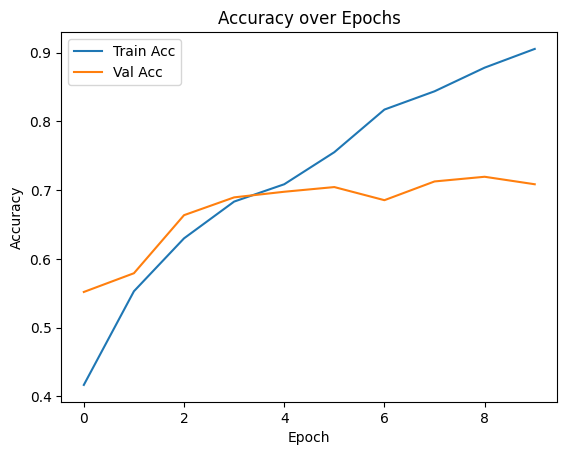

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [5]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = []
y_pred = []

for images, labels in ds_test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 844ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 514ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
[[113   8   7  25   6]
 [  9  83   6  11  11]
 [  9  11 116  11  39]
 [  0   2  10 125   1]
 [  7   7  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
49/49 - 7s - 148ms/step - loss: 0.0072 - val_loss: 0.0044
Epoch 2/20
49/49 - 5s - 108ms/step - loss: 4.0316e-04 - val_loss: 0.0020
Epoch 3/20
49/49 - 3s - 60ms/step - loss: 3.2528e-04 - val_loss: 0.0017
Epoch 4/20
49/49 - 3s - 58ms/step - loss: 3.4635e-04 - val_loss: 0.0016
Epoch 5/20
49/49 - 6s - 126ms/step - loss: 3.1223e-04 - val_loss: 0.0021
Epoch 6/20
49/49 - 3s - 58ms/step - loss: 3.0073e-04 - val_loss: 0.0016
Epoch 7/20
49/49 - 5s - 105ms/step - loss: 3.0696e-04 - val_loss: 0.0022
Epoch 8/20
49/49 - 5s - 109ms/step - loss: 3.1874e-04 - val_loss: 0.0014
Epoch 9/20
49/49 - 5s - 97ms/step - loss: 2.6379e-04 - val_loss: 0.0017
Epoch 10/20
49/49 - 6s - 126ms/step - loss: 2.6296e-04 - val_loss: 0.0014
Epoch 11/20
49/49 - 4s - 84ms/step - loss: 2.5258e-04 - val_loss: 0.0024
Epoch 12/20
49/49 - 3s - 59ms/step - loss: 2.3499e-04 - val_loss: 0.0031
Epoch 13/20
49/49 - 3s - 69ms/step - loss: 2.8847e-04 - val_loss: 0.0021
Epoch 14/20
49/49 - 5s - 93ms/step - loss: 2.2125e-04 - va

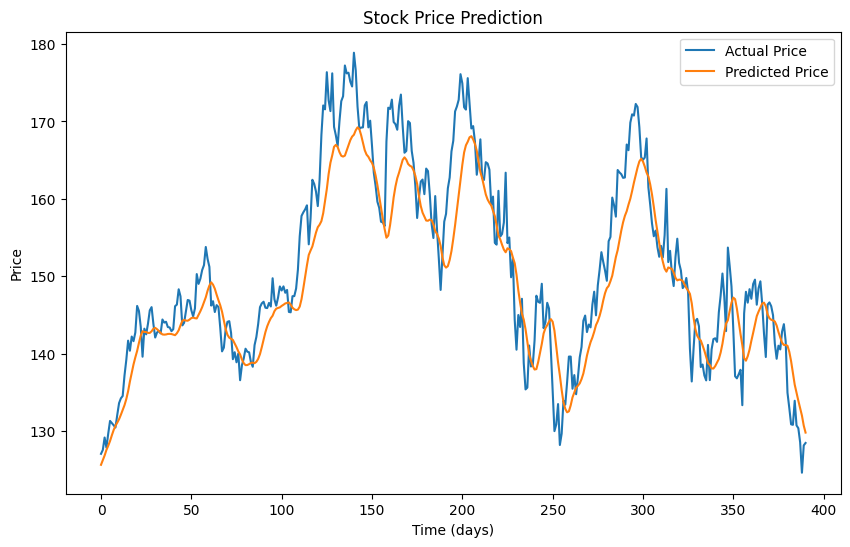

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv('/content/A5_689f8b06-28bb-42e3-9d7d-5094d2649e17.csv')
prices = df['Close'].values.reshape(-1,1)


scaler = MinMaxScaler(feature_range=(0,1))
prices_scaled = scaler.fit_transform(prices)

SEQ_LEN = 60
X, y = [], []
for i in range(SEQ_LEN, len(prices_scaled)):
    X.append(prices_scaled[i-SEQ_LEN:i, 0])
    y.append(prices_scaled[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(SEQ_LEN,1)),  # first LSTM
    LSTM(50),                                                 # second LSTM
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

pred_scaled = model.predict(X_test)
pred = scaler.inverse_transform(pred_scaled.reshape(-1,1))
actual = scaler.inverse_transform(y_test.reshape(-1,1))


plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual Price')
plt.plot(pred,  label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('Price')
plt.legend()
plt.show()
